# 12 Jan - Word2Vec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
len(corpus)

5220

In [5]:
#the corpus is already tokenized
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [6]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [7]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [8]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [9]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [10]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

word2index

{'repaired': 0,
 'maimed': 1,
 'presiding': 2,
 'proclaims': 3,
 'disregards': 4,
 'assuage': 5,
 'dared': 6,
 'vice': 7,
 'nations': 8,
 'agriculture': 9,
 'hunters': 10,
 'normalcy': 11,
 'surveys': 12,
 'unwasted': 13,
 'fill': 14,
 'bigotry': 15,
 'producers': 16,
 'complex': 17,
 'schools': 18,
 'incorporated': 19,
 'forward': 20,
 'freeman': 21,
 'unalloyed': 22,
 'agencies': 23,
 'truly': 24,
 'mobile': 25,
 'proceeded': 26,
 'prerequisites': 27,
 'irritated': 28,
 'conservator': 29,
 'colossal': 30,
 'seized': 31,
 'extension': 32,
 'destined': 33,
 'ignorant': 34,
 'elective': 35,
 'block': 36,
 'protects': 37,
 'harness': 38,
 'unwisely': 39,
 'superfluous': 40,
 'menace': 41,
 'role': 42,
 'piled': 43,
 'invites': 44,
 'distrusting': 45,
 'liberation': 46,
 'crops': 47,
 'malign': 48,
 'reaffirm': 49,
 'majority': 50,
 'merely': 51,
 'home': 52,
 'excess': 53,
 'grudging': 54,
 'division': 55,
 'execution': 56,
 'history': 57,
 'voting': 58,
 'specifying': 59,
 'debauched': 

In [11]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

print(len(word2index))

9020


In [12]:
#create index2wrod in case that we need to use
index2word = {v:k for k, v in word2index.items()}

index2word

{0: 'repaired',
 1: 'maimed',
 2: 'presiding',
 3: 'proclaims',
 4: 'disregards',
 5: 'assuage',
 6: 'dared',
 7: 'vice',
 8: 'nations',
 9: 'agriculture',
 10: 'hunters',
 11: 'normalcy',
 12: 'surveys',
 13: 'unwasted',
 14: 'fill',
 15: 'bigotry',
 16: 'producers',
 17: 'complex',
 18: 'schools',
 19: 'incorporated',
 20: 'forward',
 21: 'freeman',
 22: 'unalloyed',
 23: 'agencies',
 24: 'truly',
 25: 'mobile',
 26: 'proceeded',
 27: 'prerequisites',
 28: 'irritated',
 29: 'conservator',
 30: 'colossal',
 31: 'seized',
 32: 'extension',
 33: 'destined',
 34: 'ignorant',
 35: 'elective',
 36: 'block',
 37: 'protects',
 38: 'harness',
 39: 'unwisely',
 40: 'superfluous',
 41: 'menace',
 42: 'role',
 43: 'piled',
 44: 'invites',
 45: 'distrusting',
 46: 'liberation',
 47: 'crops',
 48: 'malign',
 49: 'reaffirm',
 50: 'majority',
 51: 'merely',
 52: 'home',
 53: 'excess',
 54: 'grudging',
 55: 'division',
 56: 'execution',
 57: 'history',
 58: 'voting',
 59: 'specifying',
 60: 'debauche

### 2. Preparing Traning Data

In [13]:
#random batch for Skip-gram model with generic window size and batch size
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized:
        for i in range(1, len(sentence) - 1):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                if (i - window_size + j) >= 0:
                    context.append(word2index[sentence[i - window_size + j]])
            for k in range(1, window_size + 1):
                if (i + k) < len(sentence):
                    context.append(word2index[sentence[i + k]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [14]:
#test the Skip-gram method with window size = 2 and batch size = 2
input_batch, target_batch = random_batch_skip_gram(2, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[7756]
 [  57]]
Target:  [[1807]
 [5117]]


In [15]:
#random batch for CBOW model with generic window size and batch size
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized:
        for i in range(1, len(sentence) - 1):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                if (i - window_size + j) >= 0:
                    context.append(word2index[sentence[i - window_size + j]])
            for k in range(1, window_size + 1):
                if (i + k) < len(sentence):
                    context.append(word2index[sentence[i + k]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append(cbow[i][0])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [16]:
#test the CBOW method with window size = 2 and batch size = 2
input_batch, target_batch = random_batch_cbow(2, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [list([2427, 6175, 7380]) list([7726, 428, 527, 3983])]
Target:  [[2318]
 [ 241]]


C:\Users\MARC\AppData\Local\Temp\ipykernel_21628\483064796.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(random_inputs), np.array(random_labels)


### 3. Skip-gram

#### 3.1. Model

In [17]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, input_words, target_words, all_vocabs):
        input_embeds = self.embedding_center_word(input_words)  #[batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = target_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 3.2. Training

In [18]:
#set training parameters
vocab_size = len(vocabs)
window_size = 2
batch_size = 10
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#prepare all_vocabs
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 300
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 9.780261 | time: 0m 43s
Epoch: 200 | cost: 10.538107 | time: 1m 27s
Epoch: 300 | cost: 9.521752 | time: 2m 12s


#### 3.3. Plotting the Embeddings

In [19]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['repaired', 'maimed', 'presiding', 'proclaims', 'disregards', 'assuage', 'dared', 'vice', 'nations', 'agriculture', 'hunters', 'normalcy', 'surveys', 'unwasted', 'fill', 'bigotry', 'producers', 'complex', 'schools', 'incorporated']


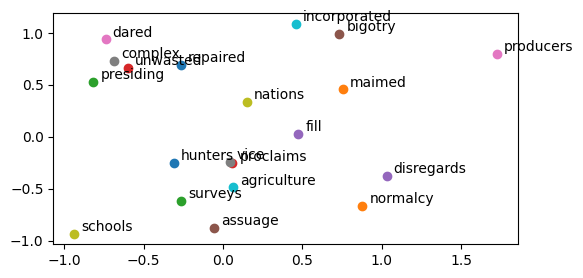

In [20]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 3.4. Cosine Similarity

In [21]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  0.33497783960154626
liberty vs. democracy:  0.5114787700255268
liberty vs. magic:  -0.06600917200117734


### 4. Skip-gram with Negative Sampling

#### 4.1. Unigram Distribution

In [22]:
#count all the occurrences of vocabs
from collections import Counter
word_count = Counter(flatten(corpus_tokenized))

word_count

Counter({'fellow': 158,
         'citizens': 248,
         'senate': 16,
         'house': 12,
         'representatives': 19,
         'vicissitudes': 5,
         'incident': 8,
         'life': 140,
         'event': 16,
         'filled': 6,
         'greater': 54,
         'anxieties': 3,
         'notification': 1,
         'transmitted': 3,
         'order': 66,
         'received': 12,
         '14th': 1,
         'day': 98,
         'present': 86,
         'month': 2,
         'hand': 51,
         'summoned': 6,
         'country': 322,
         'voice': 24,
         'hear': 12,
         'veneration': 5,
         'love': 56,
         'retreat': 9,
         'chosen': 23,
         'fondest': 1,
         'predilection': 1,
         'flattering': 1,
         'hopes': 38,
         'immutable': 3,
         'decision': 14,
         'asylum': 1,
         'declining': 3,
         'years': 143,
         'rendered': 7,
         'necessary': 82,
         'dear': 8,
         'addition': 6,


In [23]:
#count the number of total words
num_total_words = sum([c for w, c in word_count.items()])

num_total_words

58916

In [24]:
#create the unigram table
z = 0.001
unigram_table = []

for v in vocabs:
    unigram_table.extend([v] * int(((word_count[v]/num_total_words)**0.75)/z))

Counter(unigram_table)

Counter({'vice': 2,
         'nations': 14,
         'agriculture': 2,
         'fill': 1,
         'complex': 1,
         'schools': 2,
         'forward': 4,
         'agencies': 1,
         'truly': 1,
         'extension': 1,
         'destined': 1,
         'ignorant': 1,
         'elective': 1,
         'menace': 1,
         'role': 1,
         'majority': 2,
         'merely': 3,
         'home': 6,
         'division': 1,
         'execution': 1,
         'history': 8,
         'choices': 1,
         'revolutionary': 1,
         'homes': 2,
         'weapons': 1,
         'turn': 3,
         'perpetuate': 1,
         'rendered': 1,
         'look': 4,
         'aids': 1,
         'western': 2,
         'necessity': 3,
         'oppression': 1,
         'god': 9,
         'abandon': 1,
         'slaves': 1,
         'extraordinary': 1,
         'protected': 2,
         'issue': 2,
         'present': 7,
         'enterprises': 1,
         'improvement': 2,
         'supposed': 1

#### 4.2. Negative Sampling

In [25]:
import random

#prepare word sequence
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#random_batch for negative sampling method
def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

#test the negative sampling method
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[ 263, 1435, 2767],
        [5806, 4190, 3514],
        [1807, 4934,  191],
        [3450,  863, 7191],
        [6882, 2248, 7157],
        [2734, 8633, 8091],
        [8336, 3162, 5497],
        [7952, 6801, 1848],
        [8769, 4483, 2581],
        [2969, 5135, 2271]])

#### 4.3. Model

In [26]:
#Skip-gram with negative sampling model
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, input_words, target_words, negative_words):
        input_embeds = self.embedding_center_word(input_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_outside_word(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(input_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_center_word(inputs)
        
        return embeds

#### 4.4. Training

In [27]:
#train the model
window_size = 2
batch_size  = 10
emb_size    = 2
model       = SkipgramNegSampling(vocab_size, emb_size)
num_neg     = 10
optimizer   = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
start = time.time()
for epoch in range(num_epochs):    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()   
    loss = model(input_batch, target_batch, negs_batch)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 11.019981 | time: 0m 44s
Epoch: 200 | cost: 8.406925 | time: 1m 27s
Epoch: 300 | cost: 8.714912 | time: 2m 10s


#### 4.5. Plotting the Embeddings

['repaired', 'maimed', 'presiding', 'proclaims', 'disregards', 'assuage', 'dared', 'vice', 'nations', 'agriculture', 'hunters', 'normalcy', 'surveys', 'unwasted', 'fill', 'bigotry', 'producers', 'complex', 'schools', 'incorporated']


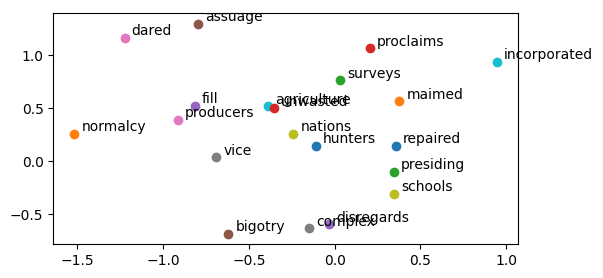

In [28]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.6. Cosine Similarity

In [29]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  -0.4818512144888122
liberty vs. democracy:  -0.9005388473186463
liberty vs. magic:  0.3421709092434547


### 5. CBOW

#### 5.1. Model

In [30]:
#CBOW model
class CBOW(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(CBOW,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, input_words, target_words, all_vocabs):
        input_embeds = self.embedding_outside_word(input_words)  #[batch_size, 1, emb_size]
        target_embeds = self.embedding_center_word(target_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = target_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 5.2. Training

In [31]:
#set training parameters
vocab_size = len(vocabs)
window_size = 1
batch_size = 2
emb_size = 2
model = CBOW(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#prepare all_vocabs tensor
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 300
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 9.227246 | time: 0m 25s
Epoch: 200 | cost: 10.118305 | time: 0m 51s
Epoch: 300 | cost: 10.283520 | time: 1m 17s


#### 5.3. Plotting the Embeddings

['repaired', 'maimed', 'presiding', 'proclaims', 'disregards', 'assuage', 'dared', 'vice', 'nations', 'agriculture', 'hunters', 'normalcy', 'surveys', 'unwasted', 'fill', 'bigotry', 'producers', 'complex', 'schools', 'incorporated']


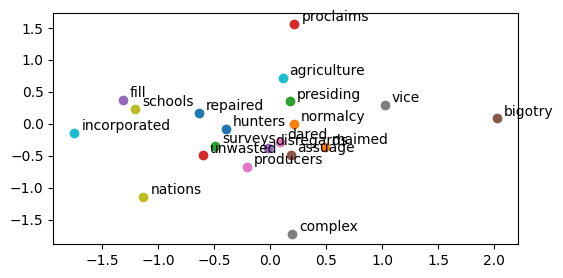

In [32]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 5.4. Cosine Similarity

In [33]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  0.5254921407234574
liberty vs. democracy:  0.9926664990041614
liberty vs. magic:  0.8891179690160671
